In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import statsmodels.api as sm
from patsy.builtins import *
import statsmodels.formula.api as smf

In [2]:
# Read the Data and check the Column Names to check the Space in the Names
df=pd.read_csv("Admission_Predict_Ver1.1.csv")
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [3]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [4]:
df = df.iloc[:,1:]  # remove column serial no

In [5]:
df.groupby('University Rating').mean()

,GRE Score,TOEFL Score,SOP,LOR,CGPA,Research,Chance of Admit
University Rating,,,,,,,
1,304.911765,100.205882,1.941176,2.426471,7.798529,0.294118,0.562059
2,309.134921,103.444444,2.682540,2.956349,8.177778,0.293651,0.626111
3,315.030864,106.314815,3.308642,3.401235,8.500123,0.537037,0.702901
4,323.304762,110.961905,4.000000,3.947619,8.936667,0.780952,0.801619
5,327.890411,113.438356,4.479452,4.404110,9.278082,0.876712,0.888082


In [36]:
df[df['Chance of Admit ']>0.82].groupby('Chance of Admit ').mean()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
Chance of Admit,,,,,,,
0.83,326.500000,112.750000,3.750000,3.875000,3.750000,9.032500,0.750000
0.84,323.909091,109.636364,3.454545,3.818182,3.772727,9.032727,0.909091
0.85,322.000000,111.500000,3.666667,4.083333,4.166667,9.041667,0.833333
0.86,325.400000,114.400000,4.200000,4.300000,4.300000,9.124000,0.900000
0.87,325.625000,111.125000,4.625000,4.375000,4.187500,9.101250,0.875000
0.88,323.000000,110.750000,5.000000,4.875000,4.500000,9.152500,1.000000
0.89,328.636364,113.545455,4.363636,4.318182,4.136364,9.270909,0.909091
0.90,330.555556,116.111111,4.000000,4.500000,4.111111,9.324444,1.000000
0.91,330.500000,115.000000,4.500000,4.250000,4.450000,9.328000,1.000000


<AxesSubplot:xlabel='University Rating', ylabel='Chance of Admit '>

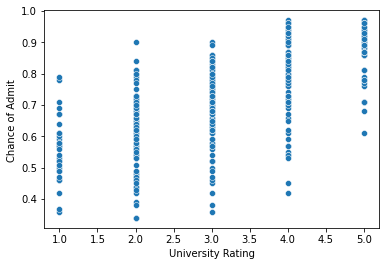

In [7]:
sns.scatterplot(x='University Rating', y = 'Chance of Admit ', data = df)

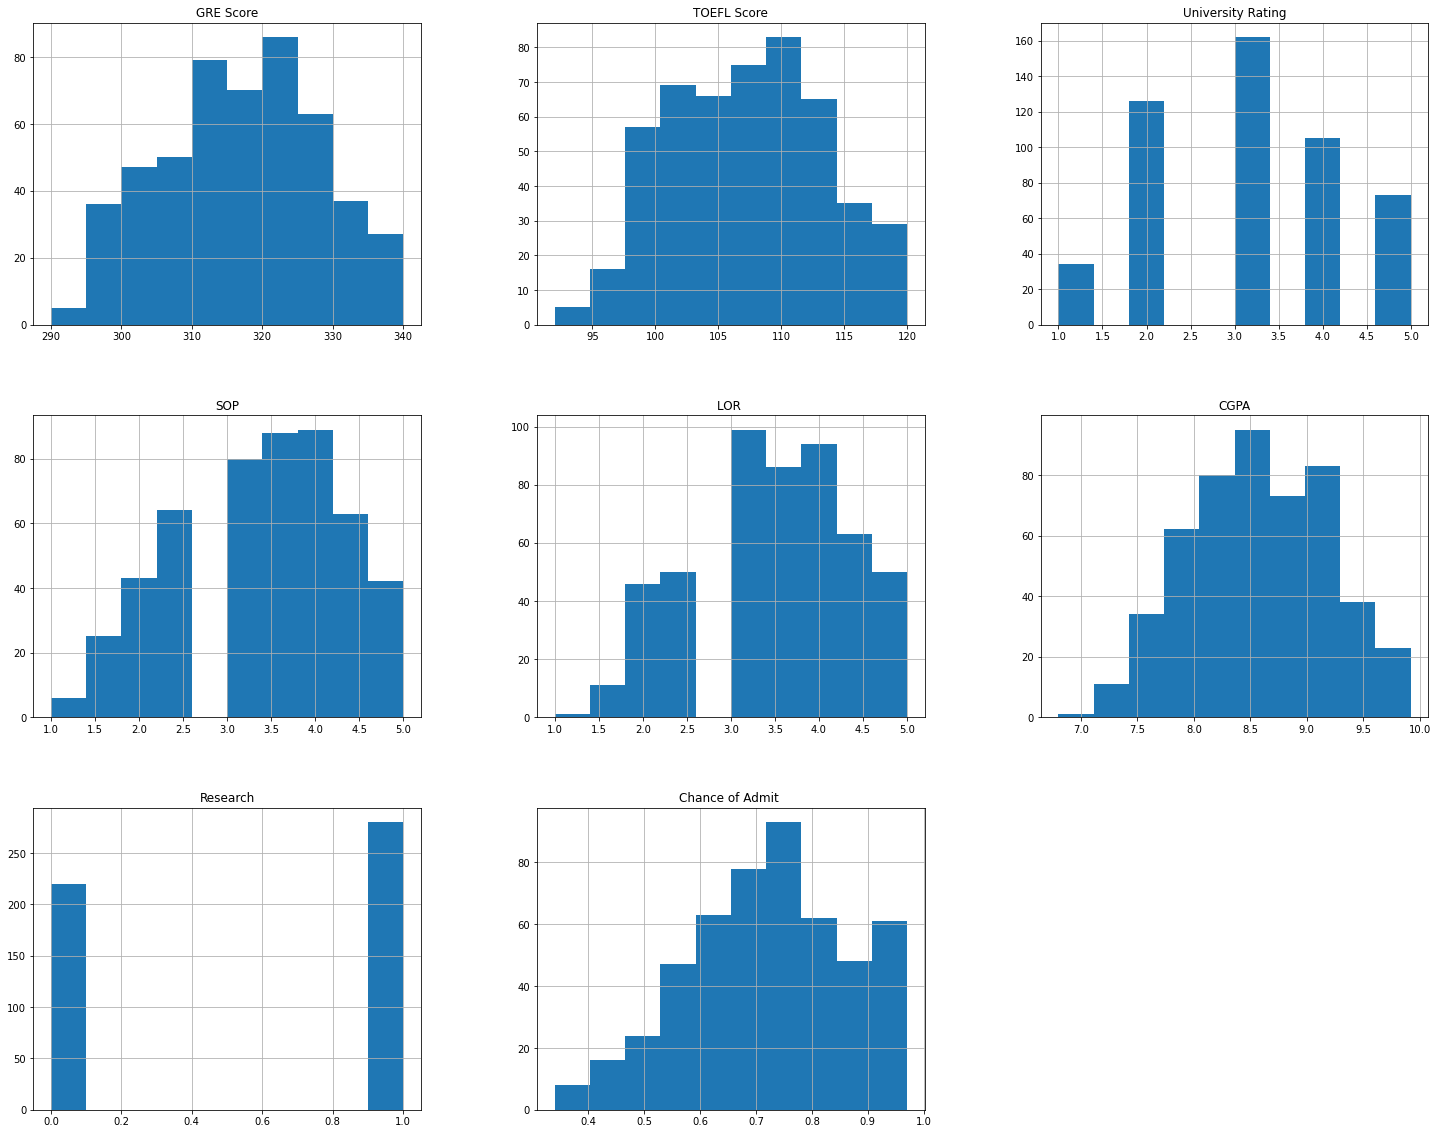

In [8]:
df.hist(bins=10, figsize=(25,20))
plt.show()

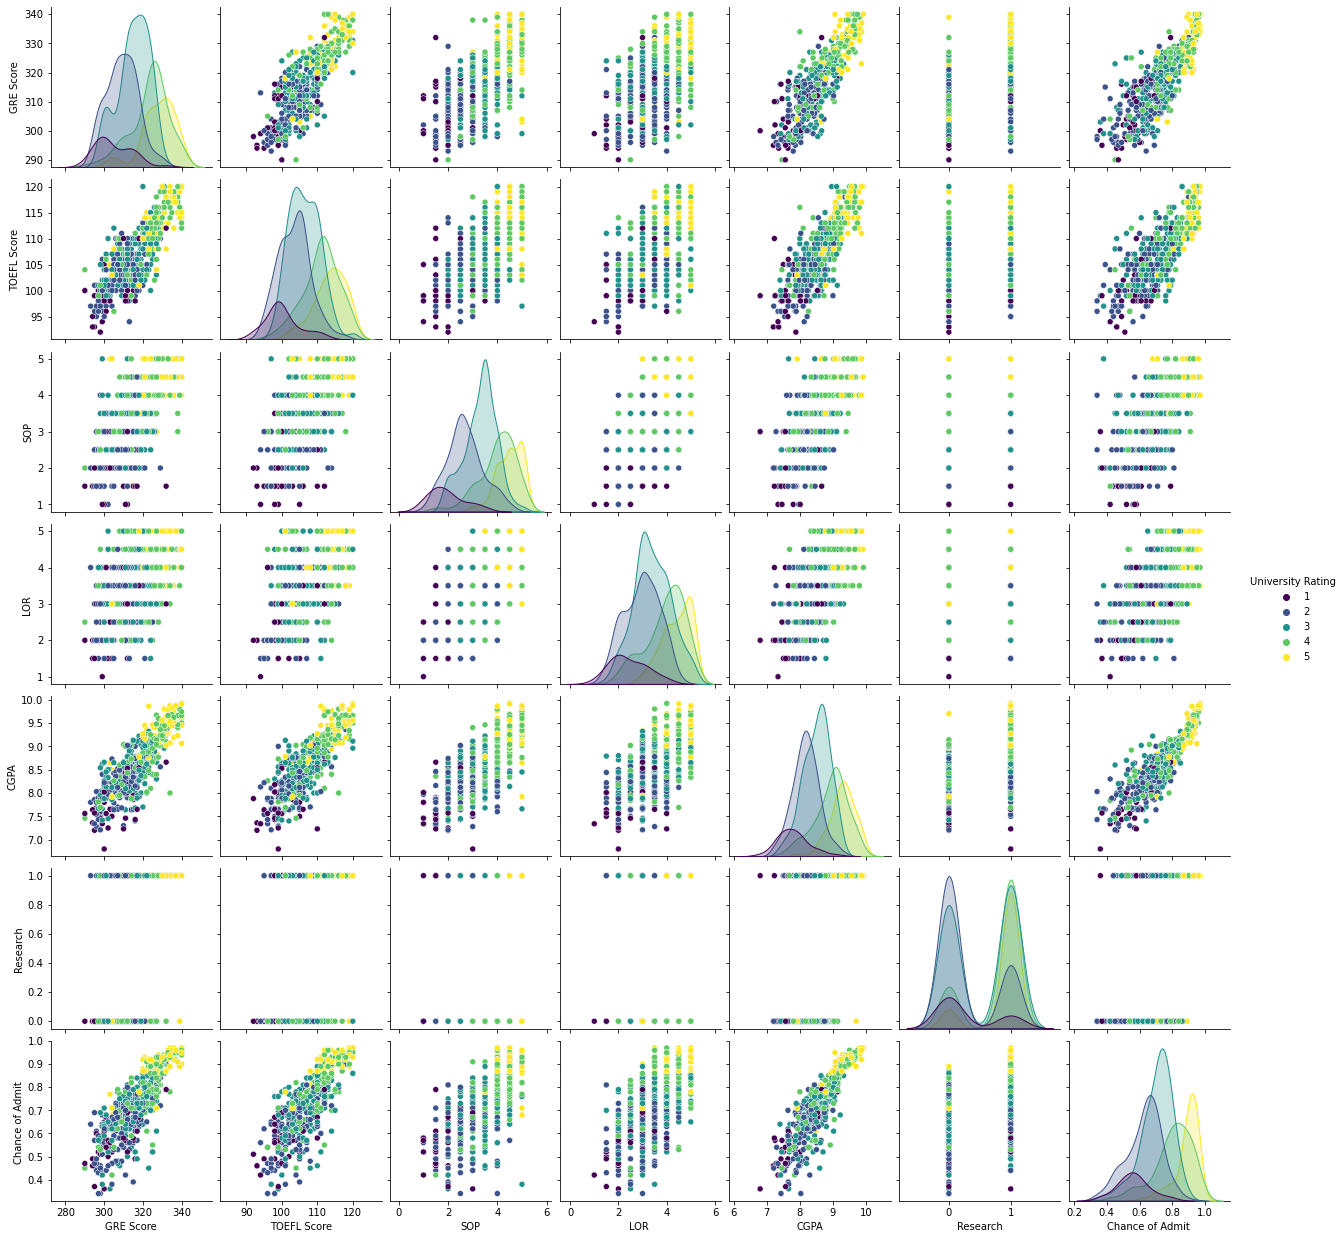

In [19]:
sns.pairplot(df,hue= 'University Rating', palette='viridis')

<AxesSubplot:xlabel='GRE Score', ylabel='Count'>

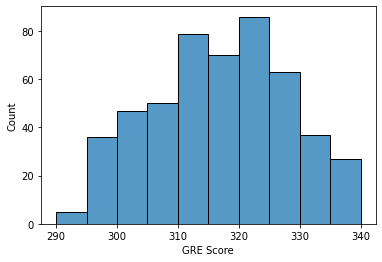

In [21]:
sns.histplot(df['GRE Score'],bins=10)

<AxesSubplot:xlabel='TOEFL Score', ylabel='Count'>

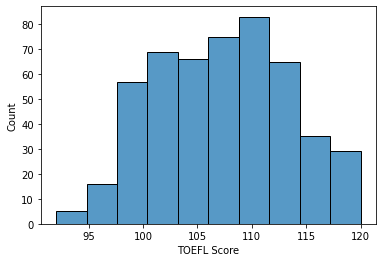

In [24]:
sns.histplot(df['TOEFL Score'],bins=10)

<AxesSubplot:xlabel='CGPA', ylabel='Count'>

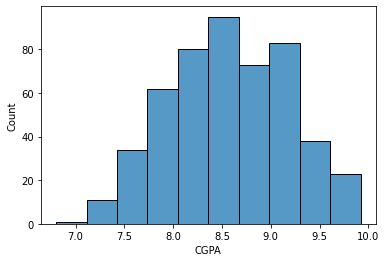

In [26]:
sns.histplot(df['CGPA'],bins=10)

<AxesSubplot:xlabel='Chance of Admit ', ylabel='Count'>

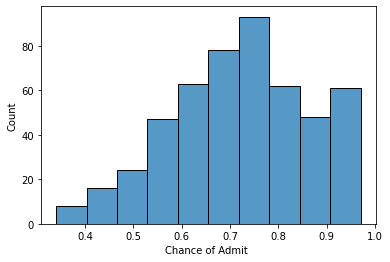

In [27]:
sns.histplot(df['Chance of Admit '],bins=10)

<AxesSubplot:xlabel='University Rating', ylabel='Chance of Admit '>

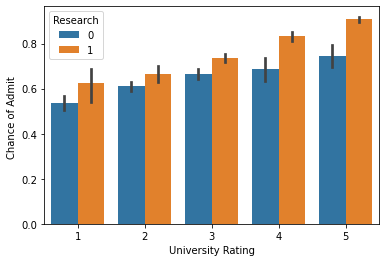

In [28]:
sns.barplot(x='University Rating',y='Chance of Admit ',data=df,hue="Research")

In [29]:
df.corr()


,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
GRE Score,1.000000,0.827200,0.635376,0.613498,0.524679,0.825878,0.563398,0.810351
TOEFL Score,0.827200,1.000000,0.649799,0.644410,0.541563,0.810574,0.467012,0.792228
University Rating,0.635376,0.649799,1.000000,0.728024,0.608651,0.705254,0.427047,0.690132
SOP,0.613498,0.644410,0.728024,1.000000,0.663707,0.712154,0.408116,0.684137
LOR,0.524679,0.541563,0.608651,0.663707,1.000000,0.637469,0.372526,0.645365
CGPA,0.825878,0.810574,0.705254,0.712154,0.637469,1.000000,0.501311,0.882413
Research,0.563398,0.467012,0.427047,0.408116,0.372526,0.501311,1.000000,0.545871
Chance of Admit,0.810351,0.792228,0.690132,0.684137,0.645365,0.882413,0.545871,1.000000


<AxesSubplot:>

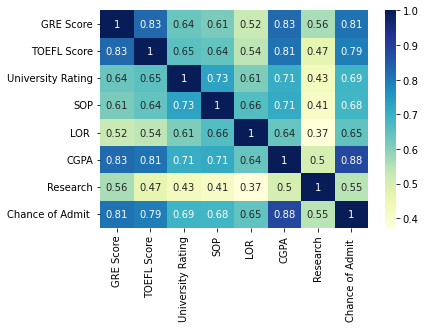

In [30]:
sns.heatmap(df.corr(),annot=True,cmap='YlGnBu')

In [43]:
r_squared = {}

In [44]:
lm1 = smf.ols("Q('Chance of Admit ') ~ CGPA",data = df).fit()
print(lm1.summary())
r_squared[.append(lm1.rsquared)]

                              OLS Regression Results                             
Dep. Variable:     Q('Chance of Admit ')   R-squared:                       0.779
Model:                               OLS   Adj. R-squared:                  0.778
Method:                    Least Squares   F-statistic:                     1752.
Date:                   Sun, 04 Dec 2022   Prob (F-statistic):          3.40e-165
Time:                           15:50:41   Log-Likelihood:                 647.04
No. Observations:                    500   AIC:                            -1290.
Df Residuals:                        498   BIC:                            -1282.
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.0443 

eval_env: 1
eval_env: 1


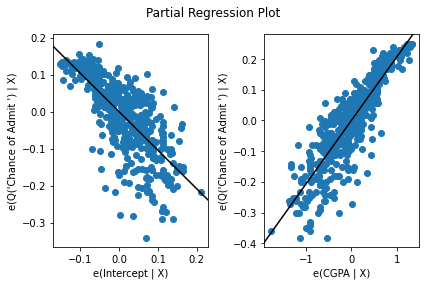

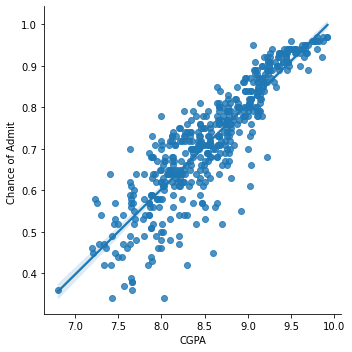

In [45]:
fig = sm.graphics.plot_partregress_grid(lm1)
fig.tight_layout(pad=1.0)
sns.lmplot(x='CGPA',y='Chance of Admit ',data=df)

                              OLS Regression Results                             
Dep. Variable:     Q('Chance of Admit ')   R-squared:                       0.657
Model:                               OLS   Adj. R-squared:                  0.656
Method:                    Least Squares   F-statistic:                     952.5
Date:                   Sun, 04 Dec 2022   Prob (F-statistic):          1.09e-117
Time:                           15:50:42   Log-Likelihood:                 537.30
No. Observations:                    500   AIC:                            -1071.
Df Residuals:                        498   BIC:                            -1062.
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept     

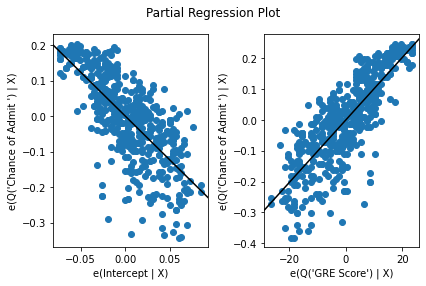

In [46]:
lm2 = smf.ols("Q('Chance of Admit ') ~ Q('GRE Score')",data = df).fit()
print(lm2.summary())
r_squared.append(lm.rsquared)
fig = sm.graphics.plot_partregress_grid(lm2)
fig.tight_layout(pad=1.0)

                              OLS Regression Results                             
Dep. Variable:     Q('Chance of Admit ')   R-squared:                       0.628
Model:                               OLS   Adj. R-squared:                  0.627
Method:                    Least Squares   F-statistic:                     839.4
Date:                   Sun, 04 Dec 2022   Prob (F-statistic):          6.73e-109
Time:                           15:50:43   Log-Likelihood:                 516.99
No. Observations:                    500   AIC:                            -1030.
Df Residuals:                        498   BIC:                            -1022.
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept 

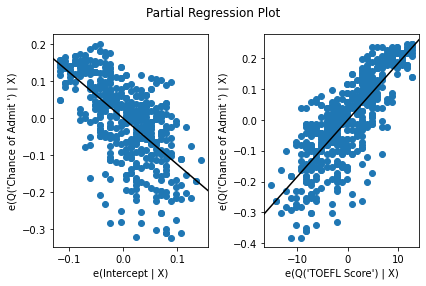

In [47]:
lm3 = smf.ols("Q('Chance of Admit ') ~ Q('TOEFL Score')",data = df).fit()
print(lm3.summary())
r_squared.append(lm3.rsquared)
fig = sm.graphics.plot_partregress_grid(lm3)
fig.tight_layout(pad=1.0)

In [48]:
lm3 = smf.ols("Q('Chance of Admit ') ~ Q('GRE Score')+Q('TOEFL Score')+Q('University Rating')+SOP+Q('LOR ')+CGPA+Research",data = df).fit()
print(lm3.summary())
r_squared.append(lm3.rsquared)


                              OLS Regression Results                             
Dep. Variable:     Q('Chance of Admit ')   R-squared:                       0.822
Model:                               OLS   Adj. R-squared:                  0.819
Method:                    Least Squares   F-statistic:                     324.4
Date:                   Sun, 04 Dec 2022   Prob (F-statistic):          8.21e-180
Time:                           15:50:43   Log-Likelihood:                 701.38
No. Observations:                    500   AIC:                            -1387.
Df Residuals:                        492   BIC:                            -1353.
Df Model:                              7                                         
Covariance Type:               nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [49]:
lm3.outlier_test().nsmallest(3,'student_resid')

,student_resid,unadj_p,bonf(p)
9,-4.559252,0.000006,0.003245
65,-3.979223,0.000080,0.039786
92,-3.929224,0.000097,0.048721


In [50]:
df_wol = df.drop(labels = [9,65,92],axis=0)
lm4 = smf.ols("Q('Chance of Admit ') ~ Q('GRE Score')+Q('TOEFL Score')+Q('University Rating')+SOP+Q('LOR ')+CGPA+Research",data = df_wol).fit()
print(lm4.summary())
r_squared.append(lm4.rsquared)



                              OLS Regression Results                             
Dep. Variable:     Q('Chance of Admit ')   R-squared:                       0.836
Model:                               OLS   Adj. R-squared:                  0.834
Method:                    Least Squares   F-statistic:                     356.4
Date:                   Sun, 04 Dec 2022   Prob (F-statistic):          1.64e-187
Time:                           15:50:45   Log-Likelihood:                 722.70
No. Observations:                    497   AIC:                            -1429.
Df Residuals:                        489   BIC:                            -1396.
Df Model:                              7                                         
Covariance Type:               nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [51]:
lm4.conf_int(alpha=0.95)

,0,1
Intercept,-1.307265,-1.294755
Q('GRE Score'),0.001966,0.002026
Q('TOEFL Score'),0.002566,0.002670
Q('University Rating'),0.005459,0.005913
SOP,0.003292,0.003840
Q('LOR '),0.015431,0.015925
CGPA,0.117956,0.119113
Research,0.019039,0.019832


In [52]:
df_wol = df.drop(labels = [9,65,92],axis=0)
lm5 = smf.ols("Q('Chance of Admit ') ~ Q('GRE Score')+Q('TOEFL Score')+Q('University Rating')+SOP+Q('LOR ')+CGPA+Research",data = df_wol).fit(cov_type='HC1')
print(lm5.summary())
r_squared.append(lm5.rsquared)

                              OLS Regression Results                             
Dep. Variable:     Q('Chance of Admit ')   R-squared:                       0.836
Model:                               OLS   Adj. R-squared:                  0.834
Method:                    Least Squares   F-statistic:                     461.8
Date:                   Sun, 04 Dec 2022   Prob (F-statistic):          6.15e-211
Time:                           15:50:45   Log-Likelihood:                 722.70
No. Observations:                    497   AIC:                            -1429.
Df Residuals:                        489   BIC:                            -1396.
Df Model:                              7                                         
Covariance Type:                     HC1                                         
                             coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

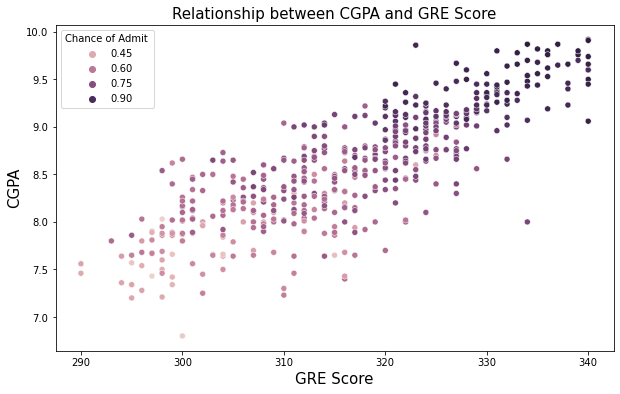

In [53]:

plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['GRE Score'], y=df.CGPA, hue=df['Chance of Admit '])
plt.title('Relationship between CGPA and GRE Score', fontsize=15)
plt.xlabel('GRE Score', fontsize=15)
plt.ylabel('CGPA', fontsize=15)
plt.show()
     

In [54]:
r_squared

[0.778651952349721,
 0.6566681523957092,
 0.6276245928675231,
 0.8219007395178417,
 0.8361194357158739,
 0.8361194357158739]